In [1]:
# Importing librariers
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize as mmz

In [2]:
# Loading student exam data
exams = np.loadtxt('datasets/exams.txt', delimiter=',', usecols=None)

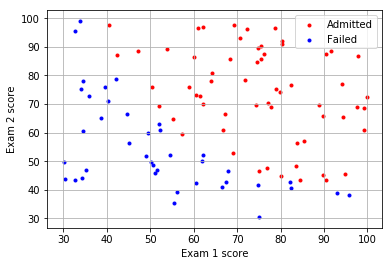

In [3]:
# Separating positive and negative exam results
positive = np.where(exams[:,2] > 0)
negative = np.where(exams[:,2] <= 0)

# Plotting results
plt.figure(1)
plt.scatter(exams[positive,0], exams[positive,1], marker='.', color='r',label='Admitted')
plt.scatter(exams[negative,0], exams[negative,1], marker='.', color='b',label='Failed')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.grid(True)

In [4]:
# Defining important variables
m = exams.shape[0]
X = np.insert(exams[:,0:2], 0, 1, axis = 1)
y = np.array(exams[:,2])[np.newaxis].T
Theta = np.zeros((1,X.shape[1]))
initialTheta = np.zeros(3)
iterations = 1500
lam = 3
alpha = 0.01

In [5]:
# Defining sigmoid function h
def sigmoid(X, Theta):
    h = 1/(1+np.exp(-np.dot(X, Theta.T)))
    return h

In [6]:
# Calculating cost
def cost(m, X, y, Theta):
    J = np.multiply((1/m), (-y * np.log(sigmoid(X, Theta)) - (1 - y) * np.log(1 - sigmoid(X, Theta))).sum())
    return J

In [7]:
# Calculating regularized cost
def cost_reg(m, X, y, Theta, lam):
    J = np.multiply((1/m), (-y * np.log(sigmoid(X, Theta)) - (1 - y) * np.log(1.00000000001 - sigmoid(X, Theta))).sum())
    reg = (lam/m * Theta[0,1:3]).sum()
    J = J + reg
    return J

cost_reg(m, X, y, Theta, lam)

0.6931471805519454

In [8]:
# Calculating gradient
def gradient(m, X, y, Theta):
    grad = 1/m * np.dot(X.T, (sigmoid(X,Theta) - y))
    return grad

In [9]:
# Running gradient and cost throught optimization function
# mmz(fun=cost_reg(m, X, y, Theta, lam), x0=initialTheta, args=(X, y), method='BFGS', jac=gradient(m, X, y, Theta, lam))

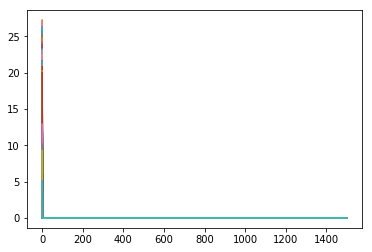

In [11]:
# Creating empty array to keep track of cost development
cost_development = np.zeros((iterations, 1))

# Gradient descent (manual)
def grad_descent(m, X, y, Theta, lam, iterations):
    for i in range(iterations):
        h = (sigmoid(X, Theta) - y) * X
        reg = lam/m * np.array(Theta[0,1:3])[np.newaxis]
        reg = np.insert(reg, 0, 0, axis = 1)
        Theta = Theta - 1/m * np.multiply(alpha, h).sum() + reg
        cost_development[0] = [cost_reg(m, X, y, Theta, lam)]
        plt.plot(cost_development)
    return Theta
    
Theta = grad_descent(m, X, y, Theta, lam, iterations)

In [13]:
Theta

array([[-34.29096094,   0.1729166 ,   0.1729166 ]])